In [143]:
from pydataset import data
mpg = data('mpg')

In [144]:
#1) Load the mpg dataset. Read the documentation for it, 
    #and use the data to answer these questions:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [154]:
#A) On average, which manufacturer has the best miles per gallon?
new_mpg = mpg.assign(avg_mil = (mpg.cty + mpg.hwy)/2)
new_mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mil
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [155]:
new_mpg = pd.DataFrame(new_mpg.groupby("manufacturer").avg_mil.mean().sort_values(ascending=False).round(2))
new_mpg

,avg_mil
manufacturer,
honda,28.50
volkswagen,25.07
hyundai,22.75
subaru,22.43
audi,22.03
toyota,21.72
pontiac,21.70
nissan,21.35
chevrolet,18.45


In [178]:
#B) How many different manufacturers are there?
mpg.manufacturer.nunique()

15

In [181]:
mpg.manufacturer.describe()

count       234
unique       15
top       dodge
freq         37
Name: manufacturer, dtype: object

In [179]:
#C) How many different models are there?
mpg.model.nunique()

38

In [182]:
mpg.model.describe()

count             234
unique             38
top       caravan 2wd
freq               11
Name: model, dtype: object

In [188]:
#D) Do automatic or manual cars have better miles per gallon?
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s4)       3
auto(s5)       3
auto(l3)       2
Name: trans, dtype: int64

In [189]:
mpg['transmission_cat']= np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission_cat
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto


In [202]:
mpg.groupby('transmission_cat')[['cty', 'hwy']].mean().sort_values(by = ['cty','hwy'], ascending = [False, False] ) #Mean on city milange and highway milage

,cty,hwy
transmission_cat,,
manual,18.675325,25.779221
auto,15.968153,22.292994


In [192]:
#2) Copy the users and roles dataframes from the examples above. 
# What do you think a right join would look like? An outer join? 
# What happens if you drop the foreign keys from the dataframes and try to merge them?
import pandas as pd
import numpy as np
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [194]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [203]:
pd.merge(users, roles, left_on= 'role_id', right_on= 'id', how='left') 
# all indivudals are included if they have id_x

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,3.0,reviewer
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


In [204]:
pd.merge(users, roles, left_on= 'role_id', right_on= 'id', how='right') # Jane and mike not included 

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [205]:
pd.merge(users, roles, left_on= 'role_id', right_on= 'id', how='inner') # only indiviudals who hace name_y are kept

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1,admin
1,2,joe,2.0,2,author
2,3,sally,3.0,3,reviewer
3,4,adam,3.0,3,reviewer


In [207]:
pd.merge(users, roles, left_on= 'role_id', right_on= 'id', how='outer') # gives all columns in right and left.

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [212]:
pd.merge(users, roles, left_on= 'role_id', right_on='id')

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1,admin
1,2,joe,2.0,2,author
2,3,sally,3.0,3,reviewer
3,4,adam,3.0,3,reviewer


In [10]:
#3) Getting data from SQL databases 

In [237]:
#A) Create a function named get_db_url. It should accept a username, hostname, password, 
# and database name and return a url formatted like in the examples in this lesson.
from env import host, user, password
def get_db_url(username, password, host_name, database_name):
    return f'mysql+pymysql://{username}:{password}@{host_name}/{database_name}'
    # Do not print out your env passwords!

In [238]:
#B) Use your function to obtain a connection to the employees database.
df= pd.read_sql(query, url)
query = """
    SELECT * FROM employees
"""
pd.read_sql(query, url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [239]:
#C) Once you have successfully run a query:

    #- Intentionally make a typo in the database url. What kind of error message do you see?
    #- Intentionally make an error in your SQL query. What does the error message look like?

In [244]:
#D) Read the employees and titles tables into two separate dataframes
employees = pd.read_sql('SELECT * FROM employees', url)
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [44]:
titles = pd.read_sql('SELECT * FROM titles', url)

In [251]:
#E) Visualize the number of employees with each title.
sql = '''
Select *
From titles
join employees using(emp_no)
where to_date > now()
'''
titles = pd.read_sql(sql, url)
dept_tite = titles.groupby("title").emp_no.count()
dept_tite

title
Assistant Engineer     3588
Engineer              30983
Manager                   9
Senior Engineer       85939
Senior Staff          82024
Staff                 25526
Technique Leader      12055
Name: emp_no, dtype: int64

<AxesSubplot:ylabel='title'>

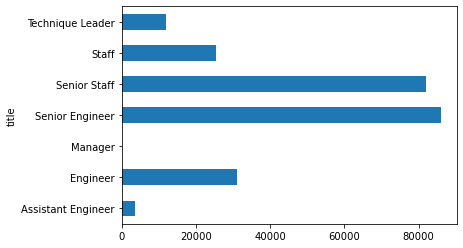

In [254]:
dept_tite.plot.barh()

In [255]:
#F) Join the employees and titles dataframes together.
new_df= pd.merge(employees, titles)
new_df

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,Senior Staff,1996-09-12,9999-01-01
...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,Engineer,1997-06-02,9999-01-01
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,Senior Engineer,2002-05-13,9999-01-01
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01


In [274]:
#G) Visualize how frequently employees change titles.
sql = '''
Select *
From titles
join employees using(emp_no)
'''
titles = pd.read_sql(sql, url)
dept_tite = titles.groupby("title").emp_no.count()
dept_tite

new_df= pd.merge(employees, titles)
new_df

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


<AxesSubplot:>

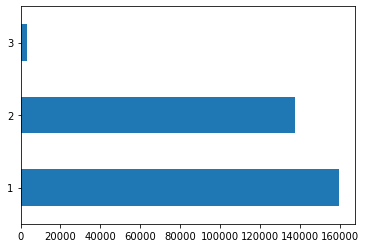

In [277]:
new_df.groupby('emp_no').title.count().value_counts().plot.barh() 
# The most common is no change to title while the second most common is to have two titles 
# while three titles is rare in frequency

In [278]:
#H) For each title, find the hire date of the employee that was hired most recently with that title.
new_df.groupby('title').hire_date.max() #(Most recent hire date by title)

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

In [282]:
#I) Write the code necessary to create a cross tabulation of the number of titles by department. 
 # (Hint: this will involve a combination of SQL and python/pandas code)
sql = '''
Select *
From titles
join dept_emp using(emp_no)
join departments using(dept_no)
where dept_emp.to_date > now()
and titles.to_date  > now()
'''
titles = pd.read_sql(sql, url)
titles.groupby("dept_name").title.count()
pd.crosstab(titles.title, titles.dept_name)

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
title,,,,,,,,,
Assistant Engineer,68,1652,0,0,0,1402,389,77,0
Engineer,627,14040,0,0,0,12081,3405,830,0
Manager,1,1,1,1,1,1,1,1,1
Senior Engineer,1790,38816,0,0,0,33625,9458,2250,0
Senior Staff,11268,1085,9545,9824,11290,1123,0,9092,28797
Staff,3574,315,2891,3073,3551,349,0,2870,8903
Technique Leader,241,5477,0,0,0,4723,1293,321,0


In [287]:
pd.crosstab(titles.title, titles.dept_name).style.highlight_max()

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
title,,,,,,,,,
Assistant Engineer,68,1652,0,0,0,1402,389,77,0
Engineer,627,14040,0,0,0,12081,3405,830,0
Manager,1,1,1,1,1,1,1,1,1
Senior Engineer,1790,38816,0,0,0,33625,9458,2250,0
Senior Staff,11268,1085,9545,9824,11290,1123,0,9092,28797
Staff,3574,315,2891,3073,3551,349,0,2870,8903
Technique Leader,241,5477,0,0,0,4723,1293,321,0


<AxesSubplot:ylabel='dept_name'>

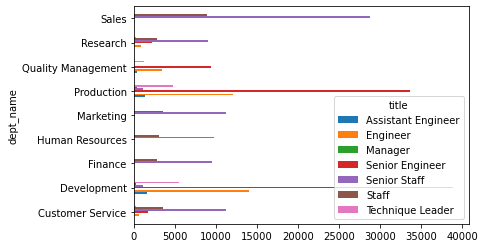

In [283]:
# This graphs the chart above
pd.crosstab(titles.dept_name, titles.title).plot.barh()

In [288]:
#4) Use your get_db_url function to help you explore the data from the chipotle database. 
# Use the data to answer the following questions:
from env import host, user, password
url = f'mysql+pymysql://{user}:{password}@{host}/chipotle'
query = """
    SELECT * FROM orders
"""
orders = pd.read_sql(query, url)
orders

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [291]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


In [292]:
#A) What is the total price for each order?
df = pd.Series(orders.item_price)
df = df.str.replace('$', '')
df = df.str.replace(',','')
df = df.astype(float)

sum_of_food = (orders.assign(price2 = df))

pd.DataFrame(sum_of_food.groupby(["order_id"]).price2.sum())

,price2
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
...,...
1830,23.00
1831,12.90
1832,13.20


In [296]:
#B) What are the most popular 3 items?
pop_orders = pd.DataFrame(orders.groupby(["item_name"]).quantity.sum())
pop_orders

,quantity
item_name,
6 Pack Soft Drink,55
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,12
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,211
Bowl,4
Burrito,6


In [297]:
pop_orders.nlargest(3, 'quantity', keep='all')

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506


In [25]:
#C) Which item has produced the most revenue?

In [298]:
most_mula = pd.DataFrame(sum_of_food.groupby(["item_name"]).price2.sum())
most_mula

,price2
item_name,
6 Pack Soft Drink,356.95
Barbacoa Bowl,672.36
Barbacoa Burrito,894.75
Barbacoa Crispy Tacos,120.21
Barbacoa Salad Bowl,106.40
Barbacoa Soft Tacos,250.46
Bottled Water,302.56
Bowl,29.60
Burrito,44.40


In [299]:
most_mula.nlargest(1, 'price2', keep='all')

,price2
item_name,
Chicken Bowl,7342.73
